# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
#import the dataset
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Exploratory Data Analysis (EDA)

In [3]:
df.shape   # finding shape of your dataset

(500, 9)

In [4]:
df.info()   # finding information about your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df = df.drop('Serial No.',axis=1)    # Droping the "serial no." column  as it is not required for prediction process
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.describe()  #gives a statistic summary

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isnull().sum()  #checking for null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Visualizing the data

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

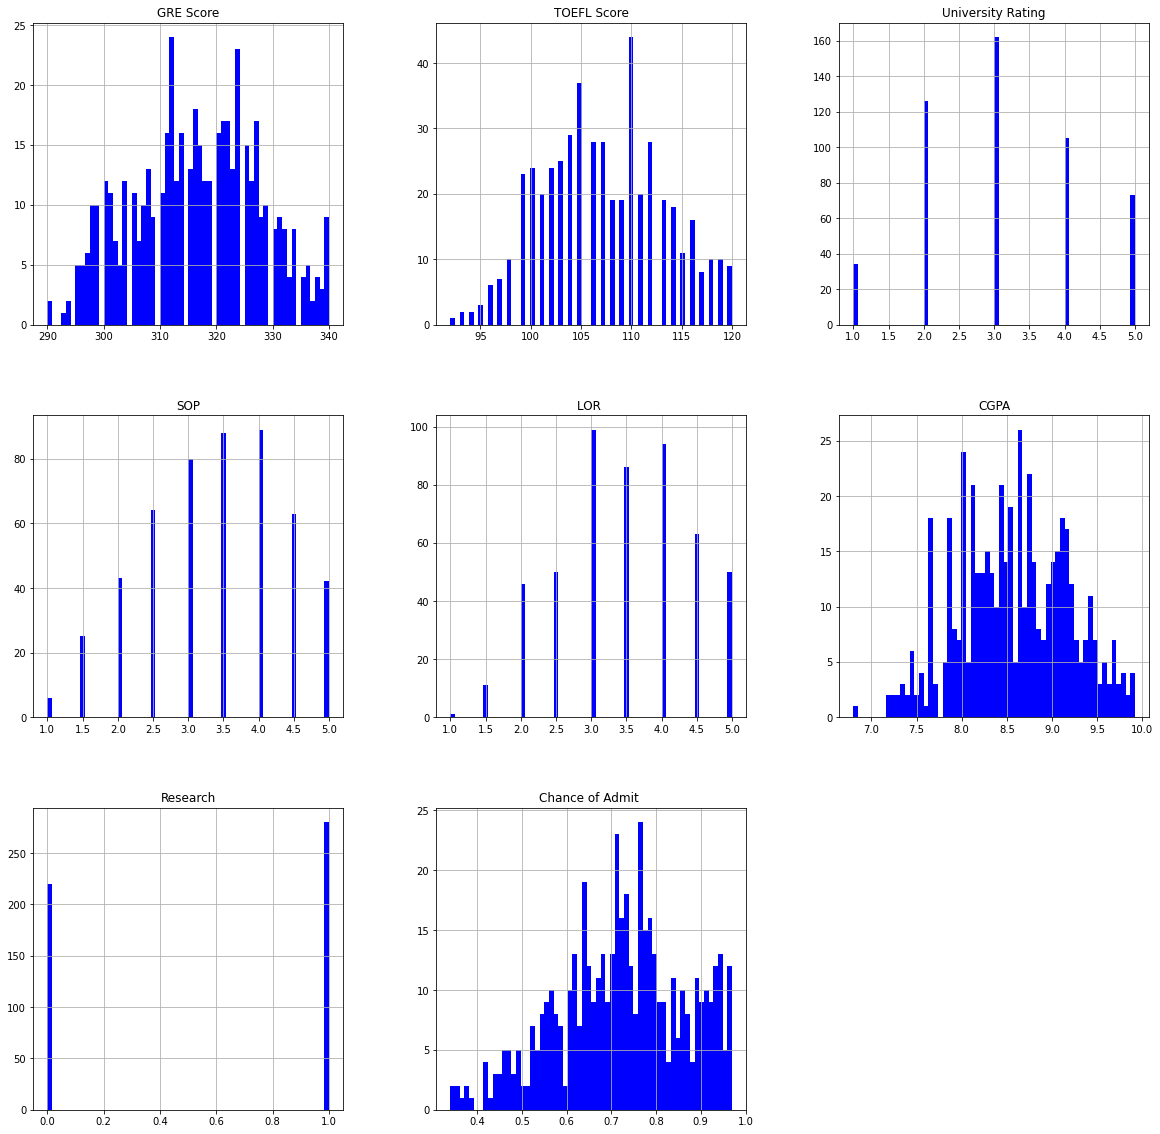

In [8]:
df.hist(bins = 60 , figsize = (20,20),color ='b')  # we can check histogram to find outliers and for visualization

<AxesSubplot:>

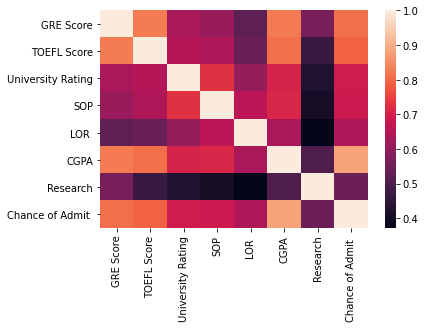

In [9]:
corr = df.corr()
sns.heatmap(corr)  #we can use heatmap to give a visual summary of the data
#we can see from the heatmap that 'CGPA','GRE Score'followed by'TOEFL Score' 
#are the more important criteria in predicting the 'Chance of Admit'

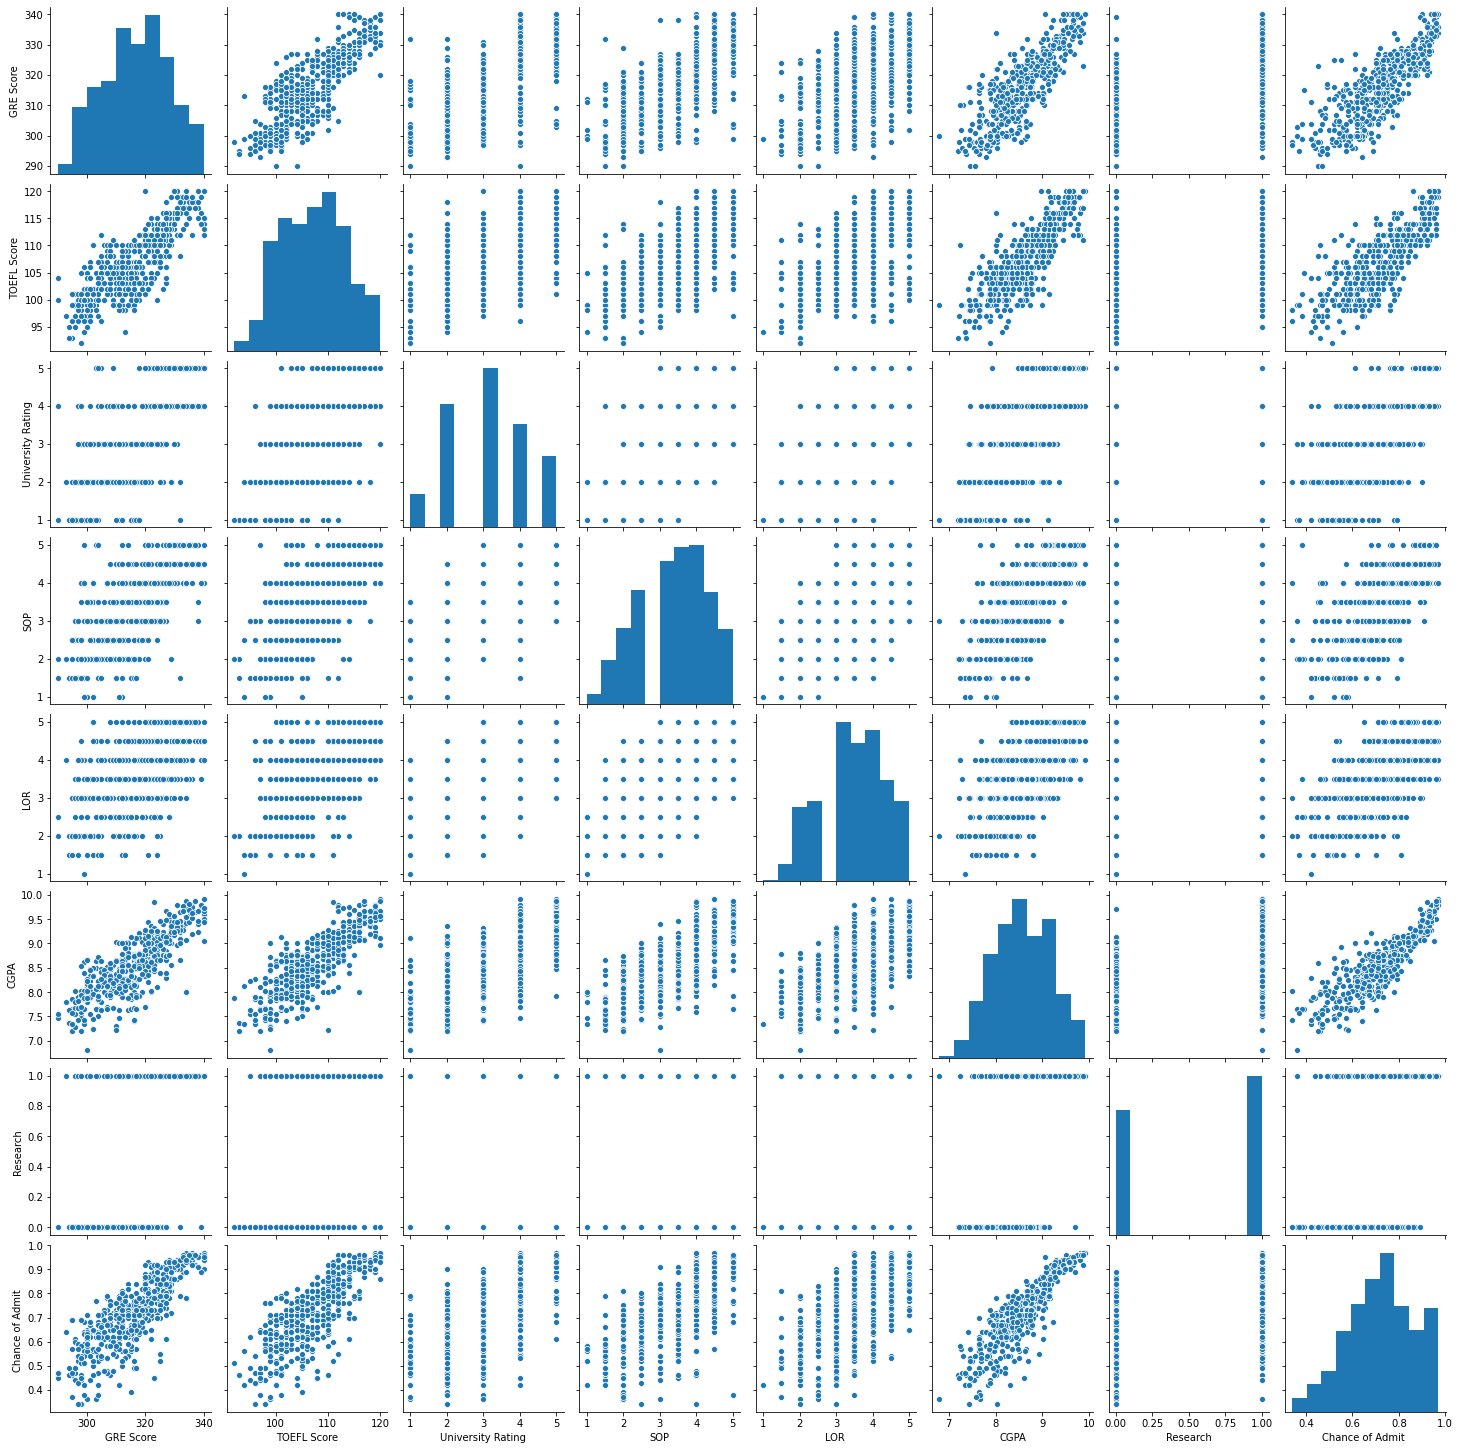

In [10]:
sns.pairplot(df)
#A pairs plot allows us to see both distribution of single variables and relationships between two variables. 

# Data preprocessing

In [18]:
#Extracting the data in X and y columns 
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

# Feature Scaling

In [12]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 1.81923762  1.77886545  0.77558214 ...  1.09894429  1.77680627
   0.88640526]
 [ 0.66714832 -0.03160087  0.77558214 ...  1.09894429  0.48585943
   0.88640526]
 [-0.0418297  -0.52536441 -0.09979274 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.19888185  2.10804114  1.65095702 ...  1.63976333  1.62785086
   0.88640526]
 [-0.39631872 -0.68995225  0.77558214 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 0.93301508  0.95592621  0.77558214 ...  1.09894429  0.76721964
  -1.12815215]]


Splitting the data in train and test data

In [13]:
# Splitting the x and y into training and the test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

# Training the model using Random Forest Regressor of sklearn library

Fitting the data

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Making predicting of the y value

In [15]:
y_pred = model.predict(x_test)
y_pred

array([0.6455, 0.8339, 0.7655, 0.878 , 0.6377, 0.6829, 0.5189, 0.6745,
       0.5299, 0.7   , 0.6259, 0.7307, 0.6457, 0.7825, 0.8894, 0.5113,
       0.8156, 0.6499, 0.772 , 0.5497, 0.5219, 0.7388, 0.5533, 0.9291,
       0.8671, 0.7002, 0.6376, 0.5205, 0.6171, 0.6334, 0.7076, 0.4485,
       0.6386, 0.8364, 0.6034, 0.5377, 0.8445, 0.9006, 0.656 , 0.6948,
       0.6747, 0.9073, 0.8882, 0.6878, 0.7415, 0.8058, 0.9621, 0.7999,
       0.6098, 0.6731, 0.6667, 0.6366, 0.6534, 0.795 , 0.7035, 0.8436,
       0.5342, 0.8836, 0.6402, 0.6889, 0.4391, 0.921 , 0.6438, 0.9438,
       0.7148, 0.672 , 0.735 , 0.8412, 0.4932, 0.7279, 0.9207, 0.7844,
       0.6926, 0.6339, 0.8077, 0.9144, 0.7603, 0.7388, 0.5498, 0.6713,
       0.5965, 0.8976, 0.5621, 0.6982, 0.781 , 0.5397, 0.8058, 0.6969,
       0.494 , 0.6335, 0.723 , 0.7771, 0.6621, 0.6752, 0.6496, 0.9309,
       0.5458, 0.5653, 0.6482, 0.6526, 0.9187, 0.7045, 0.9537, 0.6014,
       0.6741, 0.5847, 0.6857, 0.854 , 0.7011, 0.6977, 0.4866, 0.6144,
      

printing the MSE, RMSE and R-squared error

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:       ',mae)
print('Mean Squared Error:        ',mse)
print('Root Mean Squared Error:   ',rmse)
print('R-squared (Accuracy) Score:',r2)

Mean Absolute Error:        0.044749999999999894
Mean Squared Error:         0.004220312599999992
Root Mean Squared Error:    0.06496393307058919
R-squared (Accuracy) Score: 0.7686866209920531


# Visualizing the Output

PLotting the actual and predicted values 

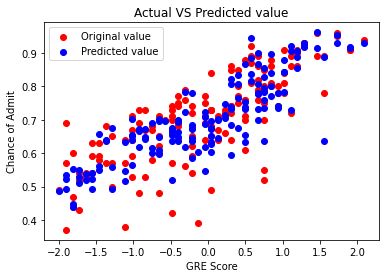

In [17]:
plt.scatter(x_test[:,0],y_test,c='red',label = 'Original value')
plt.scatter(x_test[:,0],y_pred,c='blue',label = 'Predicted value') 
plt.title("Actual VS Predicted value")
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()